<a href="https://colab.research.google.com/github/shoyon-at-git/EDGE_2202003/blob/main/rainfall_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/Temp_and_rain.csv')
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.3 KB


In [3]:
df.describe()

,tem,Month,Year,rain
count,1380.000000,1380.000000,1380.00000,1380.000000
mean,25.066213,6.500000,1958.00000,203.275431
std,3.682411,3.453304,33.20842,202.730898
min,16.800600,1.000000,1901.00000,0.000000
25%,22.114125,3.750000,1929.00000,18.498850
50%,27.012950,6.500000,1958.00000,145.086000
75%,28.007850,9.250000,1987.00000,347.639500
max,29.526000,12.000000,2015.00000,1012.020000


In [4]:
print(df.isnull().sum())

tem      0
Month    0
Year     0
rain     0
dtype: int64


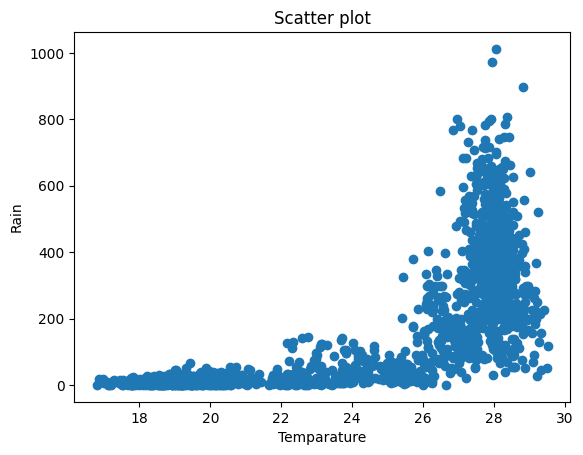

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.tem, df.rain)
plt.title("Scatter plot")
plt.xlabel("Temparature")
plt.ylabel("Rain")
plt.show();


In [6]:
X = df[['tem', 'Month']]
y = df['rain']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.46732831170412337

In [9]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(X_test)
error = mse(y_test, predicted) ** .5
print(error)


150.86546210121048


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(X_train,y_train)
    name = type(model).__name__
    score = model.score(X_test,y_test)*100
    errors[name] = score


In [11]:
errors

{'RandomForestRegressor': 78.3361039364738,
 'DecisionTreeRegressor': 68.34828552787964,
 'LinearRegression': 46.73283117041234}

<BarContainer object of 3 artists>

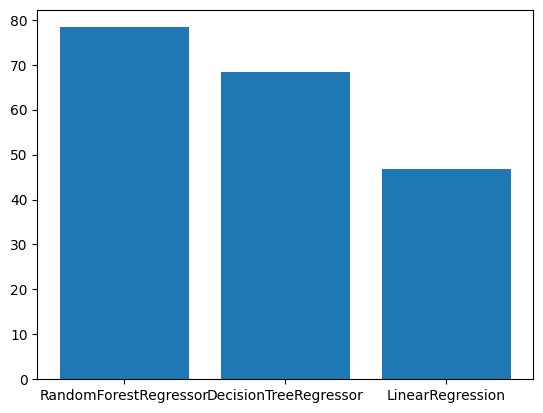

In [12]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())


/tmp/ipython-input-120495182.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


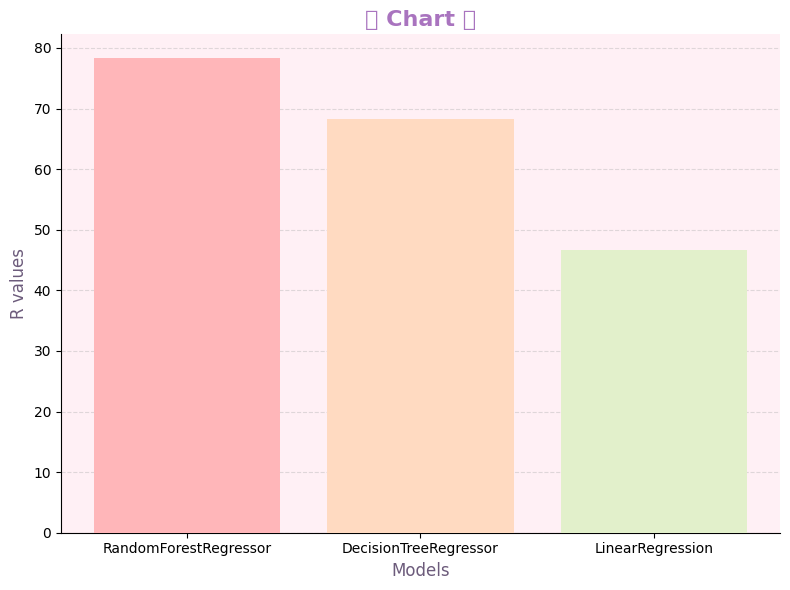

In [13]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
